# 0. Setup Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet_v2_320'
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
print(os.name)

nt


In [6]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [8]:
#https://www.tensorflow.org/install/source

In [7]:
if os.name=='nt':
    !pip install wget
    import wget

In [6]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [12]:
# !pip install --upgrade pip
!pip install Pillow
!pip install pandas
!pip install matplotlib
!pip install apache-beam
!pip install avro-python3
!pip install contextlib2
!pip install imageio
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2
!pip install scipy
!pip install Cython
!pip install lvis
!pip install gin-config

  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
  Using cached importlib_resources-6.1.1-py3-none-any.whl (33 kB)


  Using cached crcmod-1.7-cp39-cp39-win_amd64.whl
  Using cached jsonschema-4.20.0-py3-none-any.whl (84 kB)
  Using cached protobuf-4.25.1-cp39-cp39-win_amd64.whl (413 kB)
  Using cached pyarrow-11.0.0-cp39-cp39-win_amd64.whl (20.6 MB)
  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)
  Using cached dill-0.3.1.1-py3-none-any.whl
  Using cached docopt-0.6.2-py2.py3-none-any.whl
  Using cached attrs-23.1.0-py3-none-any.whl (61 kB)
  Using cached jsonschema_specifications-2023.11.2-py3-none-any.whl (17 kB)
  Using cached referencing-0.31.1-py3-none-any.whl (25 kB)
  Using cached dnspython-2.4.2-py3-none-any.whl (300 kB)
  Created wheel for hdfs: filename=hdfs-2.7.3-py3-none-any.whl size=34351 sha256=eeadf8df225c07fd5e007483e0310de88dd436300e80f6841624e6693227d284
  Stored in directory: c:\users\iki11\appdata\local\pip\cache\wheels\05\6f\21\aa8d233f90da3017b4ef7c61829589dc267402d376dd3efcf5
  Created wheel for pyjsparser: filename=pyjsparser-2.7.1-py3-none-any.whl size=25989 sha256=f

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.15.1 requires protobuf<4.24,>=3.19.6, but you have protobuf 4.25.1 which is incompatible.


  Using cached avro-python3-1.10.2.tar.gz (38 kB)
  Created wheel for avro-python3: filename=avro_python3-1.10.2-py3-none-any.whl size=44034 sha256=fec05e2f0d8701d0c7bf626415e9fcb55d0e7d49622585e5c1634de2ca698d35
  Stored in directory: c:\users\iki11\appdata\local\pip\cache\wheels\5a\29\4d\510c0e098c49c5e49519f430481a5425e60b8752682d7b1e55
Successfully built avro-python3
  Using cached contextlib2-21.6.0-py2.py3-none-any.whl (13 kB)
Found existing installation: protobuf 4.25.1
Uninstalling protobuf-4.25.1:
  Successfully uninstalled protobuf-4.25.1
Found existing installation: matplotlib 3.8.2
Uninstalling matplotlib-3.8.2:
  Successfully uninstalled matplotlib-3.8.2
  Using cached protobuf-4.25.1-cp39-cp39-win_amd64.whl (413 kB)
  Using cached matplotlib-3.2.0.tar.gz (40.5 MB)
  Running setup.py clean for matplotlib
Failed to build matplotlib
    Running setup.py install for matplotlib: started
    Running setup.py install for matplotlib: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'D:\Presentasi Project TSH\TFOD\numplate\Scripts\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\iki11\\AppData\\Local\\Temp\\pip-install-4v9bobxq\\matplotlib_6c3e363ee4684c5ab7310daf6d0816fd\\setup.py'"'"'; __file__='"'"'C:\\Users\\iki11\\AppData\\Local\\Temp\\pip-install-4v9bobxq\\matplotlib_6c3e363ee4684c5ab7310daf6d0816fd\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\iki11\AppData\Local\Temp\pip-wheel-l1vigngt'
       cwd: C:\Users\iki11\AppData\Local\Temp\pip-install-4v9bobxq\matplotlib_6c3e363ee4684c5ab7310daf6d0816fd\
  Complete output (604 lines):
  
  Edit setup.cfg to change the build options; suppress output with --quiet.
  

  Using cached lvis-0.5.3-py3-none-any.whl (14 kB)
  Using cached matplotlib-3.8.2-cp39-cp39-win_amd64.whl (7.6 MB)
  Using cached gin_config-0.5.0-py3-none-any.whl (61 kB)


In [13]:
!pip install pyyaml
!pip install google-api-python-client
!pip install google-cloud-bigquery
!pip install kaggle
!pip install opencv-python-headless
!pip install psutil
!pip install py-cpuinfo
!pip install sacrebleu
!pip install sentencepiece
!pip install seqeval
!pip install tensorflow-addons
!pip install tensorflow-datasets
!pip install tensorflow-hub
!pip install tensorflow-model-optimization

  Using cached uritemplate-4.1.1-py2.py3-none-any.whl (10 kB)
  Using cached googleapis_common_protos-1.61.0-py2.py3-none-any.whl (230 kB)
  Using cached google_crc32c-1.5.0-cp39-cp39-win_amd64.whl (27 kB)
  Using cached python_slugify-8.0.1-py2.py3-none-any.whl (9.7 kB)
  Using cached bleach-6.1.0-py3-none-any.whl (162 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110693 sha256=f288df1eab656cc240b9a22f98827d38c180c94e6782d3f74b7c970155bcb449
  Stored in directory: c:\users\iki11\appdata\local\pip\cache\wheels\d2\ed\a5\da3a0cfb13373d1ace41cafa4f2467d858c55c52473ba72799
Successfully built kaggle
  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
  Using cached seqeval-1.2.2-py3-none-any.whl
  Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)
  Using cached promise-2.3.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.59.3 requires protobuf>=4.21.6, but you have protobuf 3.20.3 which is incompatible.


In [16]:
!pip install pycocotools-windows

ERROR: Could not find a version that satisfies the requirement pycocotools-windows (from versions: none)
ERROR: No matching distribution found for pycocotools-windows


In [15]:
!pip install pycocotools

In [21]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.19.1/protoc-3.19.1-win64.zip"
    wget.download(url)
    !move protoc-3.19.1-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.19.1-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\eval_util.py -> build\lib\object_detection
copying object_detection\eval_util_test.py -> build\lib\object_detection
copying object_detection\exporter.py -> build\lib\object_detection
copying object_detection\exporter_lib_tf2_test.py -> build\lib\object_detection
copying object_detection\exporter_lib_v2.py -> build\lib\object_detection
copying object_detection\exporter_main_v2.py -> build\lib\object_detection
copying object_detection\exporter_tf1_test.py -> build\lib\object_detection
copying object_detection\export_inference_graph.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2_test.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_tf2.py -> build\lib\object_detection
copying object_detection\export_tflite_ssd_graph.py -> build\lib\

d:\Presentasi Project TSH\TFOD\numplate\lib\site-packages\setuptools\_distutils\cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
d:\Presentasi Project TSH\TFOD\numplate\lib\site-packages\setuptools\_distutils\cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools

Obtaining file:///D:/Presentasi%20Project%20TSH/TFOD/numplate/Tensorflow/models/research/slim
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


In [18]:
!pip install --upgrade h5py

In [8]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2023-12-02 20:41:01.019705: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.

Running tests under Python 3.9.7: d:\Presentasi Project TSH\TFOD\numplate\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac

W1202 20:41:07.419252 23256 module_wrapper.py:149] From d:\Presentasi Project TSH\TFOD\numplate\lib\site-packages\keras\src\backend.py:873: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

2023-12-02 20:41:07.421694: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE SSE2 SSE3 SSE4.1 SSE4.2 AVX2 FMA, in other operations, rebuild TensorFlow with th

In [9]:
import object_detection

In [ ]:
!pip list

In [14]:
if os.name =='posix':
    #!wget {PRETRAINED_MODEL_URL}
    #!mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 46042990 / 46042990        1 file(s) moved.


x ssd_mobilenet_v2_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [16]:
#labels = [{'name':'Senang', 'id':1}, {'name':'Sedih', 'id':2}, {'name':'Marah', 'id':3}, {'name':'Bosan', 'id':4}, {'name':'Bingung', 'id':5}, {'name':'Takut', 'id':6}]
labels = [{'name':'Bersemangat', 'id':1}, {'name':'Tidak Bersemangat', 'id':2}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [10]:
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

x Tensorflow/workspace/images/train/
x Tensorflow/workspace/images/train/Bingung_1.jpg
x Tensorflow/workspace/images/train/Bingung_1.xml
x Tensorflow/workspace/images/train/Bingung_10.jpg
x Tensorflow/workspace/images/train/Bingung_10.xml
x Tensorflow/workspace/images/train/Bingung_11.jpg
x Tensorflow/workspace/images/train/Bingung_11.xml
x Tensorflow/workspace/images/train/Bingung_12.jpg
x Tensorflow/workspace/images/train/Bingung_12.xml
x Tensorflow/workspace/images/train/Bingung_13.jpg
x Tensorflow/workspace/images/train/Bingung_13.xml
x Tensorflow/workspace/images/train/Bingung_14.jpg
x Tensorflow/workspace/images/train/Bingung_14.xml
x Tensorflow/workspace/images/train/Bingung_15.jpg
x Tensorflow/workspace/images/train/Bingung_15.xml
x Tensorflow/workspace/images/train/Bingung_16.jpg
x Tensorflow/workspace/images/train/Bingung_16.xml
x Tensorflow/workspace/images/train/Bingung_17.jpg
x Tensorflow/workspace/images/train/Bingung_17.xml
x Tensorflow/workspace/images/train/Bingung_18.

In [11]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [12]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')}

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record


Traceback (most recent call last):
  File "Tensorflow\scripts\generate_tfrecord.py", line 168, in <module>
    tf.app.run()
  File "D:\TF - Object Detection\TF - Object Detection\tfod\lib\site-packages\tensorflow\python\platform\app.py", line 36, in run
    _run(main=main, argv=argv, flags_parser=_parse_flags_tolerate_undef)
  File "D:\TF - Object Detection\TF - Object Detection\tfod\lib\site-packages\absl\app.py", line 308, in run
    _run_main(main, args)
  File "D:\TF - Object Detection\TF - Object Detection\tfod\lib\site-packages\absl\app.py", line 254, in _run_main
    sys.exit(main(argv))
  File "Tensorflow\scripts\generate_tfrecord.py", line 158, in main
    tf_example = create_tf_example(group, path)
  File "Tensorflow\scripts\generate_tfrecord.py", line 114, in create_tf_example
    image = Image.open(encoded_jpg_io)
  File "D:\TF - Object Detection\TF - Object Detection\tfod\lib\site-packages\PIL\Image.py", line 3186, in open
    raise UnidentifiedImageError(
PIL.Unidentified

# 4. Copy Model Config to Training Folder

In [13]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [18]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [19]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [12]:
config

{'model': ssd {
   num_classes: 2
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   match

In [20]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [21]:
pipeline_config.model.ssd.num_classes = len(labels) #for ssd
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [22]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [22]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [23]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [24]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet_v2_320 --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet_v2_320\pipeline.config --num_train_steps=10000


In [ ]:
!{command}

# 7. Evaluate the Model

In [24]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [25]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet_v2_320 --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet_v2_320/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet_v2_320


In [ ]:
!{command}

# 8. Load Train Model From Checkpoint

In [10]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [24]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-46')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [25]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [26]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])
print(category_index)

{1: {'id': 1, 'name': 'Bersemangat'}, 2: {'id': 2, 'name': 'Tidak Bersemangat'}}


In [53]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'Bosen_miftah_7.jpg')
# IMAGE_PATH = 'foto_bareng.jpg'

In [26]:
IMAGE_PATH

'Tensorflow\\workspace\\images\\test\\Bosen_miftah_10.jpg'

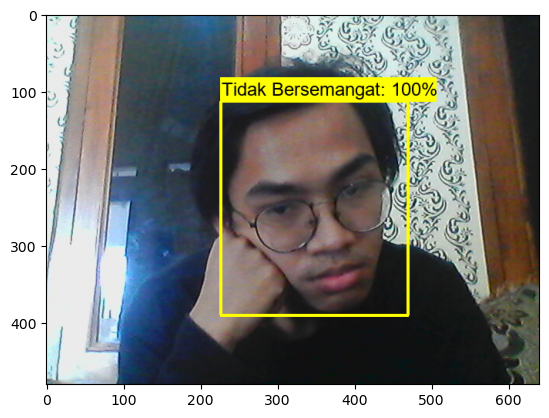

In [54]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections


# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1

image_np_with_detections = image_np.copy()


viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=50,
            min_score_thresh=.6,
            agnostic_mode=False)



plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [ ]:
#!pip install opencv-python

In [ ]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.|
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    #data = detections['detection_classes']+label_id_offset

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                #data,
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                #print(category_index[data[0]]['name']),
                use_normalized_coordinates=True,
                max_boxes_to_draw=50,
                min_score_thresh=.8,
                agnostic_mode=False)

    data = detections['detection_classes']+label_id_offset
    print(category_index[data[0]]['name'])
    
    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (1280, 720)))
   
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Bersemangat
Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bersemangat
Tidak Bers

# 10. Freezing the Graph

In [11]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [12]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [13]:
print(command)

python Tensorflow/models/research/object_detection/exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet_v2_320/pipeline.config --trained_checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet_v2_320 --output_directory=Tensorflow/workspace/models/my_ssd_mobnet_v2_320/export


In [14]:
!{command}

2021-12-02 11:21:13.359325: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /u01/app/oracle/product/11.2.0/xe/lib:
2021-12-02 11:21:13.359355: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-12-02 11:21:16.751433: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /u01/app/oracle/product/11.2.0/xe/lib:
2021-12-02 11:21:16.751478: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-02 11:21:16.751508: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (rizkipra

W1202 11:21:40.664084 140424843298624 save_impl.py:71] Skipping full serialization of Keras layer <object_detection.core.freezable_batch_norm.FreezableBatchNorm object at 0x7fb6c437dca0>, because it is not built.
W1202 11:21:40.664184 140424843298624 save_impl.py:71] Skipping full serialization of Keras layer <keras.layers.core.lambda_layer.Lambda object at 0x7fb6c437d190>, because it is not built.
W1202 11:21:40.664275 140424843298624 save_impl.py:71] Skipping full serialization of Keras layer <object_detection.core.freezable_batch_norm.FreezableBatchNorm object at 0x7fb6c4276400>, because it is not built.
W1202 11:21:40.664411 140424843298624 save_impl.py:71] Skipping full serialization of Keras layer <keras.layers.core.lambda_layer.Lambda object at 0x7fb6c42764f0>, because it is not built.
W1202 11:21:40.664523 140424843298624 save_impl.py:71] Skipping full serialization of Keras layer <object_detection.core.freezable_batch_norm.FreezableBatchNorm object at 0x7fb6cc36e8b0>, because 

2021-12-02 11:21:53.129003: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
W1202 11:22:14.535066 140424843298624 save.py:263] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxPredictor_layer_call_fn while saving (showing 5 of 260). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: Tensorflow/workspace/models/my_ssd_mobnet_v2_320/export/saved_model/assets
I1202 11:22:21.150547 140424843298624 builder_impl.py:783] Assets written to: Tensorflow/workspace/models/my_ssd_mobnet_v2_320/export/saved_model/assets
INFO:tensorflow:Writing pipeline config file to Tensorflow/workspace/mod

# 10.5 Frozen Inference

In [ ]:
import os
import re
import numpy as np

model_dir = 'Tensorflow/workspace/models/my_ssd_mobnet_v2_tf1'
# create the dir for model export
output_directory = 'Tensorflow/workspace/models/my_ssd_mobnet_v2_tf1/exported_model'

lst = os.listdir(model_dir)
lst = [l for l in lst if 'model.ckpt-' in l and '.meta' in l]
steps = np.array([int(re.findall('\d+', l)[0]) for l in lst])
last_model = lst[steps.argmax()].replace('.meta', '')
pipeline_fname = 'Tensorflow/workspace/models/my_ssd_mobnet_v2_tf1/pipeline.config'
last_model_path = os.path.join(model_dir, last_model)

In [ ]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_inference_graph.py ')

In [ ]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --output_directory={} --trained_checkpoint_prefix={}".format(
    FREEZE_SCRIPT, pipeline_fname, output_directory, last_model_path)

In [ ]:
print(command)

In [ ]:
!{command}

# 11. Conversion to TFJS

In [41]:
!pip install tensorflowjs

In [42]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [43]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow/workspace/models/my_ssd_mobnet_v2_320/export/saved_model Tensorflow/workspace/models/my_ssd_mobnet_v2_320/tfjsexport


In [44]:
!{command}

2021-11-30 11:50:12.116861: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/rizkiprats/Documents/TensorFlow Learn/MyProjects/TF - Object Detection/tfod/lib/python3.8/site-packages/cv2/../../lib64:/u01/app/oracle/product/11.2.0/xe/lib:/u01/app/oracle/product/11.2.0/xe/lib:
2021-11-30 11:50:12.116898: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-11-30 11:50:17.251625: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/rizkiprats/Documents/TensorFlow Learn/MyProjects/TF - Object Detection/tfod/lib/python3.8/site-packages/cv2/../../lib64:/u01/app/oracle/product/11.

In [ ]:
#Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [45]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [46]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [47]:
print(command)

python Tensorflow/models/research/object_detection/export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet_v2_320/pipeline.config --trained_checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet_v2_320 --output_directory=Tensorflow/workspace/models/my_ssd_mobnet_v2_320/tfliteexport


In [48]:
!{command}

2021-11-30 11:51:19.931654: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/rizkiprats/Documents/TensorFlow Learn/MyProjects/TF - Object Detection/tfod/lib/python3.8/site-packages/cv2/../../lib64:/u01/app/oracle/product/11.2.0/xe/lib:/u01/app/oracle/product/11.2.0/xe/lib:
2021-11-30 11:51:19.931695: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-11-30 11:51:23.357499: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/rizkiprats/Documents/TensorFlow Learn/MyProjects/TF - Object Detection/tfod/lib/python3.8/site-packages/cv2/../../lib64:/u01/app/oracle/product/11.

2021-11-30 11:51:47.615343: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
W1130 11:52:07.277916 139999254886208 save.py:263] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxPredictor_layer_call_fn while saving (showing 5 of 260). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: Tensorflow/workspace/models/my_ssd_mobnet_v2_320/tfliteexport/saved_model/assets
I1130 11:52:13.366226 139999254886208 builder_impl.py:783] Assets written to: Tensorflow/workspace/models/my_ssd_mobnet_v2_320/tfliteexport/saved_model/assets


In [49]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [50]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [51]:
print(command)

tflite_convert --saved_model_dir=Tensorflow/workspace/models/my_ssd_mobnet_v2_320/tfliteexport/saved_model --output_file=Tensorflow/workspace/models/my_ssd_mobnet_v2_320/tfliteexport/saved_model/detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [52]:
!{command}

2021-11-30 11:52:34.282571: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/rizkiprats/Documents/TensorFlow Learn/MyProjects/TF - Object Detection/tfod/lib/python3.8/site-packages/cv2/../../lib64:/u01/app/oracle/product/11.2.0/xe/lib:/u01/app/oracle/product/11.2.0/xe/lib:
2021-11-30 11:52:34.282602: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-11-30 11:52:37.028061: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/rizkiprats/Documents/TensorFlow Learn/MyProjects/TF - Object Detection/tfod/lib/python3.8/site-packages/cv2/../../lib64:/u01/app/oracle/product/11.

# 13. Zip and Export Models 

In [53]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')